Перед началом выполнения, сделайте копию этого colab'а. Чтобы сделать копию нужно в пункте меню Файл выбрать "Сохранить копию на диске"

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import itertools

# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [ ]:
def linan(a: np.matrix, b: np.matrix) -> np.matrix:
    if np.linalg.cond(a) >= 1/sys.float_info.epsilon:
        print('Error: matrix a is a singular matrix')
        return None
    return np.linalg.inv(a) @ b.T

In [ ]:
a11, a12, b1 = map(lambda x: float(x), input().split(' '))
a21, a22, b2 = map(lambda x: float(x), input().split(' '))

a = np.matrix([[a11, a12], [a21, a22]], dtype=float)
b = np.matrix([b1, b2], dtype=float)

linan(a, b)

1 2 3
5 2 8


matrix([[1.25 ],
        [0.875]])

# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

Нужно сделать без использования  циклов.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [ ]:
def decorate_matrix(n: int):
    ones = np.ones((n, n), dtype=float)
    ones[1:n-1, 1:n-1] = 0
    return ones

In [ ]:
decorate_matrix(5)

array([[1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1.]])

# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [ ]:
from scipy import optimize

In [ ]:
def f(x: float, a = 3, b = 4) -> float:
    return (x + a) ** 2 - b

def g(x: float, a = 3, b = 4) -> float:
    return np.abs(f(x, a = 3, b = 4))

In [ ]:
def find_value(func, val, a, b, eps=1):
    for i in np.arange(a, b, eps):
        if (abs(func(i) - val) < eps):
            yield i

In [ ]:
a, b = -10, 10
f_min = optimize.minimize_scalar(f)
g_min = optimize.minimize_scalar(g)

f_min_x = list(find_value(f, f_min.fun, a, b))
g_min_x = list(find_value(g, g_min.fun, a, b))

print(f'fmin: {f_min.fun:.4f}\ngmin: {g_min.fun:.4f}')

fmin: -4.0000
gmin: 0.0000


# Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

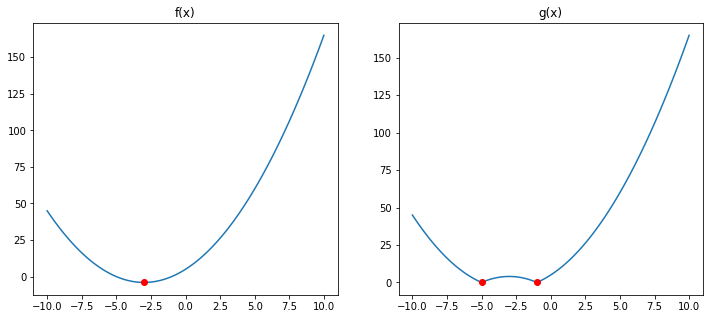

In [ ]:
r = 5
n = 100
g_x = np.linspace(a, b, n)
g_y = [g(x) for x in g_x]

f_x = np.linspace(a, b, n)
f_y = [f(x) for x in f_x]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

ax1.plot(f_x, f_y)
for x in f_min_x:
    ax1.plot(x, f_min.fun, 'ro', c='red')
ax1.set_title('f(x)')
 
ax2.plot(g_x, g_y)
for x in g_min_x:
    ax2.plot(x, g_min.fun, 'ro', c='red')
ax2.set_title("g(x)")

plt.show()

# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
def C(n, k):
    return np.math.factorial(n) / (np.math.factorial(n-k) * np.math.factorial(k))

In [ ]:
p = 1 / 2**10 * 2
trys = 1000
q = 1 - p

1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)? 

In [ ]:
A = sum([ p ** i * C(trys, i) * q ** (trys - i) for i in range(1, trys + 1) ])

print(f'{A:.4f}')

0.8584


 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой стороной (орлом или решкой)? 

In [ ]:
# 1011111111
# 0011111111
# 1111111100
# 1111111101
# 0111111110
win_combs = 5
q_n = 1 - p * win_combs
A = 1 - q_n ** trys

print(f'{A:.4f}')

0.9999


 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой стороной (орлом или решкой)?

In [ ]:
A = C(1000, 3) * p ** 3 * q ** (1000-3)

print(f'{A:.4f}')

0.1763
